In [10]:
import os,natsort
# plot the time for each batch
import matplotlib.pyplot as plt
import pandas as pd


In [11]:
dir = '/home/mayurpl/sem_2/special_problems/ml_profiling/pace_logs/results/'

In [16]:
#  get all the files in the directory
files = os.listdir(dir)

#  sort the files
files = natsort.natsorted(files)

max_batch_time = 0
max_batch_file = ''
config_to_time = {}
for file in files:
    try:
        with open(dir + file + "/gpu_idle_times", 'r') as f:
            lines = f.readlines()
            config = file.split('.')[0]
            for line in lines:
                time = line.split(' ')[0]
                if float(time) > max_batch_time:
                    max_batch_time = float(time)
                    max_batch_file = file
                print(file,line)
                try:
                    config_to_time[config].append(time)
                except:
                    config_to_time[config] = [time]
    except:
        pass


b128_gpu2 1.018847942352295 ms

b128_gpu2 402.93682861328125 ms

b128_gpu2 0.002047999994829297 ms

b128_gpu2 2498.12890625 ms

b128_gpu2 0.002047999994829297 ms

b128_gpu2 2239.11328125 ms

b128_gpu2 0.0030720001086592674 ms

b128_gpu2 2538.2255859375 ms

b128_gpu2 0.0010239999974146485 ms

b128_gpu2 2145.355712890625 ms

b128_gpu2 1.2148799896240234 ms

b128_gpu2 2133.199951171875 ms

b128_gpu2 0.002047999994829297 ms

b128_gpu2 2077.787109375 ms

b128_gpu2 0.002047999994829297 ms

b128_gpu2 1973.6053466796875 ms

b128_gpu2 0.002047999994829297 ms

b128_gpu2 2283.843505859375 ms

b128_gpu2 276.9203186035156 ms

b128_gpu2 1823.5709228515625 ms

b128_gpu2 0.9682239890098572 ms

b128_gpu2 1677.5577392578125 ms

b128_gpu2 233.69314575195312 ms

b128_gpu2 1538.5906982421875 ms

b128_gpu2 485.7866516113281 ms

b128_gpu2 1582.2203369140625 ms

b128_gpu2 271.2535095214844 ms

b128_gpu2 1512.54736328125 ms

b128_gpu2 477.9120788574219 ms

b128_gpu2 1376.795654296875 ms

b128_gpu2 776.44909667

In [17]:
# print max batch time and the file
print('The max idle time is ' + str(max_batch_time) + 'ms in the file ' + max_batch_file)

The max batch time is 29881.541015625ms in the file b512_gpu4


In [18]:
config_to_time

{'b128_gpu2': ['1.018847942352295',
  '402.93682861328125',
  '0.002047999994829297',
  '2498.12890625',
  '0.002047999994829297',
  '2239.11328125',
  '0.0030720001086592674',
  '2538.2255859375',
  '0.0010239999974146485',
  '2145.355712890625',
  '1.2148799896240234',
  '2133.199951171875',
  '0.002047999994829297',
  '2077.787109375',
  '0.002047999994829297',
  '1973.6053466796875',
  '0.002047999994829297',
  '2283.843505859375',
  '276.9203186035156',
  '1823.5709228515625',
  '0.9682239890098572',
  '1677.5577392578125',
  '233.69314575195312',
  '1538.5906982421875',
  '485.7866516113281',
  '1582.2203369140625',
  '271.2535095214844',
  '1512.54736328125',
  '477.9120788574219',
  '1376.795654296875',
  '776.4490966796875',
  '1151.415283203125',
  '470.0139465332031',
  '1488.985107421875',
  '410.0054931640625',
  '1417.026611328125',
  '603.7657470703125',
  '1360.9298095703125',
  '634.281982421875',
  '1659.35302734375',
  '375.7109375',
  '1829.8265380859375',
  '281.39

In [20]:
config_to_time = {k:sum([float(i) for i in v])/len(v) for k,v in config_to_time.items()}

Text(1, 480, 'Moving to device + forward and backward pass <= ? ms')

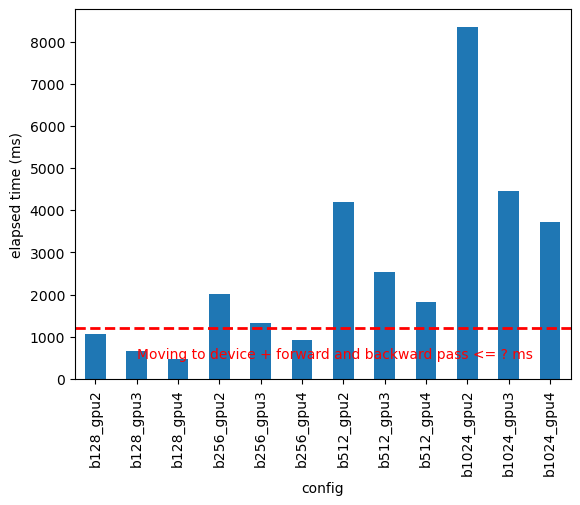

In [23]:
df = pd.DataFrame(list(config_to_time.items()), columns=['config', 'time'])

df['time'] = df['time'].astype(float)
df.plot(kind='bar',x='config',y='time')
# no legend
plt.legend().remove()
# y axis label
plt.ylabel('elapsed time (ms)')
# add horizontal line at 500 ms with large red dashed line
plt.axhline(y=1200, color='r', linestyle='--', linewidth=2)
# annotate the line
plt.text(1, 480, 'Moving to device + forward and backward pass <= ? ms', color = 'red')


